<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/plotting_NZposter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("googledrive")
install.packages("data.table")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("ggpmisc")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘xts’, ‘zoo’, ‘SparseM’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘ggpp’, ‘confintr’, ‘polynom’, ‘quantreg’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(googledrive)
library(data.table)
library(ggplot2)
library(reshape2)
library(ggpmisc)
library(dplyr)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e652b14cd15897891ac970655c102084&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVFsRWQ4d2NZbmk2MG1TakJUS252ZGJINGdvT0ZpWV9KQlV1SzFyNkxDMGtOVF9KUzRsWGVobU5MVktUQ190STFWT1NMZyIsInN0YXRlIjoiZTY1MmIxNGNkMTU4OTc4OTFhYzk3MDY1NWMxMDIwODQifQ==


In [4]:
# https://drive.google.com/file/d/1--2ioz7nN6ca4COdbQyssYW8VP2no1TO/view?usp=drive_link
drive_download(file = as_id('1--2ioz7nN6ca4COdbQyssYW8VP2no1TO'), path =  '/content/quantile_test_result.csv', overwrite = FALSE)
quantile_result <- read.csv('/content/quantile_test_result.csv')

File downloaded:

• quantile_test_result.csv <id: 1--2ioz7nN6ca4COdbQyssYW8VP2no1TO>

Saved locally as:

• /content/quantile_test_result.csv



In [5]:
# ks_test_result.csv
# https://drive.google.com/file/d/1KYWeKSydTPsaz7-7EtECWcBjl2ZlLrQB/view?usp=drive_link
drive_download(file = as_id('1KYWeKSydTPsaz7-7EtECWcBjl2ZlLrQB'), path =  '/content/ks_test_result.csv', overwrite = FALSE)
ks_result <- read.csv('/content/ks_test_result.csv')


File downloaded:

• ks_test_result.csv <id: 1KYWeKSydTPsaz7-7EtECWcBjl2ZlLrQB>

Saved locally as:

• /content/ks_test_result.csv



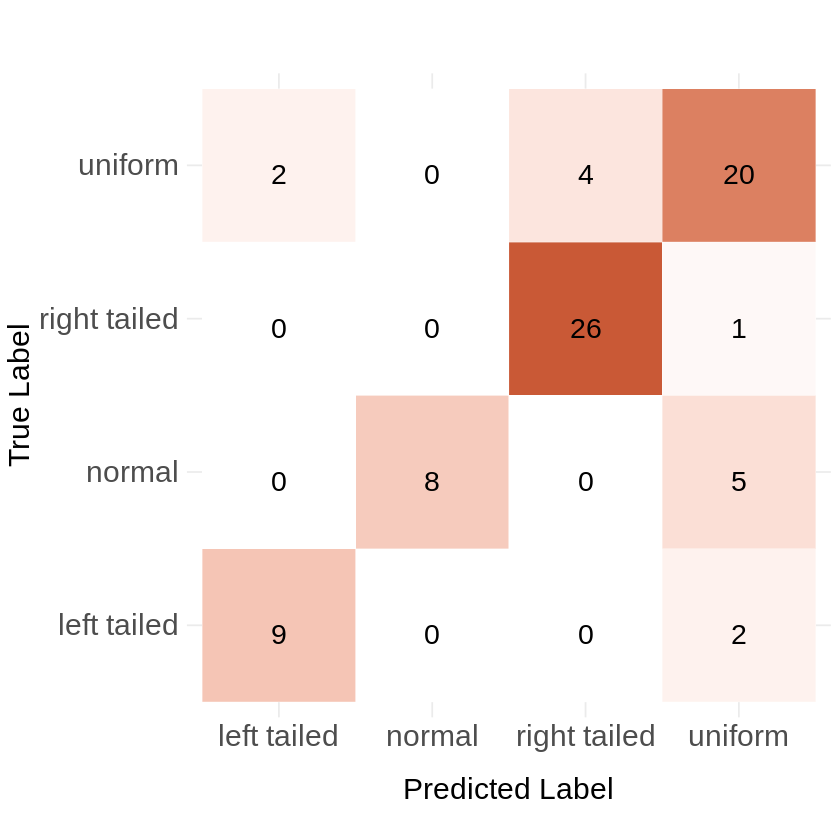

In [6]:

# Create a confusion matrix
confusion_matrix <- matrix(c(9, 0, 0, 2,
                             0, 8, 0, 5,
                             0, 0, 26, 1,
                             2, 0, 4, 20),
                           nrow = 4, byrow = TRUE)

# Add row and column names
rownames(confusion_matrix) <- c("left tailed", "normal", "right tailed", "uniform")
colnames(confusion_matrix) <- c("left tailed", "normal", "right tailed", "uniform")

# Melt the matrix to long format
confusion_matrix_melt <- melt(confusion_matrix)
colnames(confusion_matrix_melt) <- c("True", "Predicted", "Count")

# Plot the confusion matrix using ggplot2
ggplot(data = confusion_matrix_melt, aes(x = Predicted, y = True, fill = Count)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = 'white', high = '#c95936') +
  geom_text(aes(label = Count), vjust = 1, size = 6) +  # Increase text size inside tiles
  theme_minimal() +
  labs(title = "", x = "Predicted Label", y = "True Label") +
  theme(
    axis.text.x = element_text(size = 18),
    axis.text.y = element_text(size = 18),
    axis.title.x = element_text(size = 18, margin = margin(t = 15)),
    axis.title.y = element_text(size = 18),
    plot.title = element_text(size = 20),
    legend.position = "none"
  ) +
  coord_fixed(ratio = 1)  # Adjust the aspect ratio to make boxes smaller


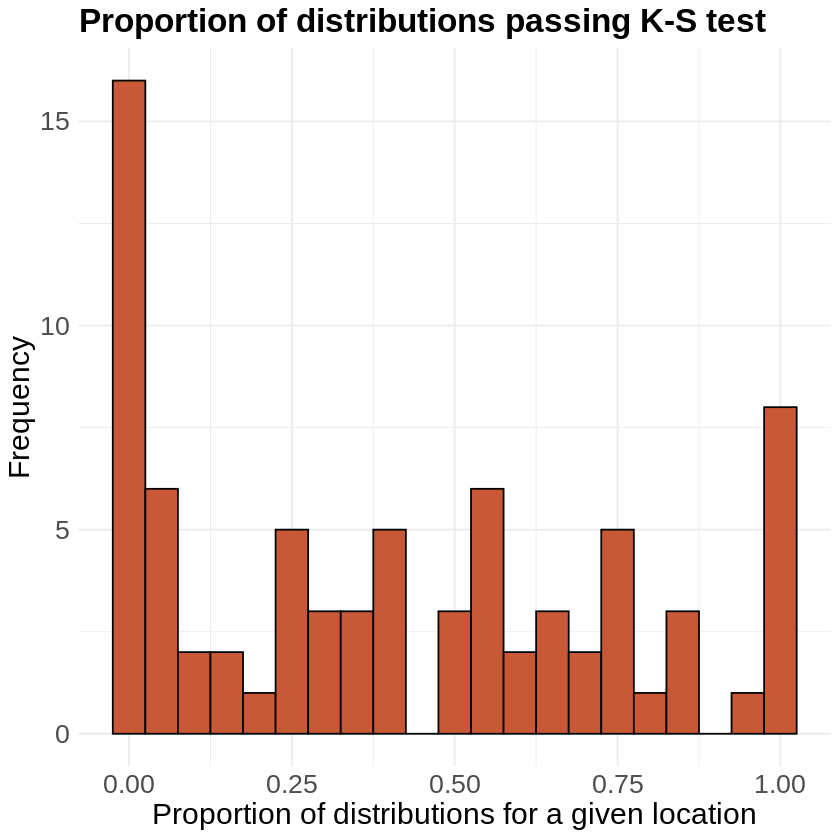

In [7]:
ggplot(ks_result, aes(x = ks_result_m)) +
  geom_histogram(binwidth = 0.05, fill = "#c95936", color = "black") +
  labs(x = "Proportion of distributions for a given location", y = "Frequency", title = "Proportion of distributions passing K-S test") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 18),
    axis.title.y = element_text(size = 18),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    plot.title = element_text(size = 20, face = "bold")
  )


In [22]:
quantile_result <-  data.table(quantile_result)

[1] 0.5575481

In [32]:
# head(quantile_result)
quantile_result[,list(z = summary(lm(y_res~x_res))$r.squared),by = quantile_n_list]

quantile_n_list,z
<int>,<dbl>
0,0.3353537
1,0.4537627
2,0.5025939
3,0.5282763
4,0.5446704
5,0.5616779
6,0.5629418
7,0.5957408
8,0.5950330


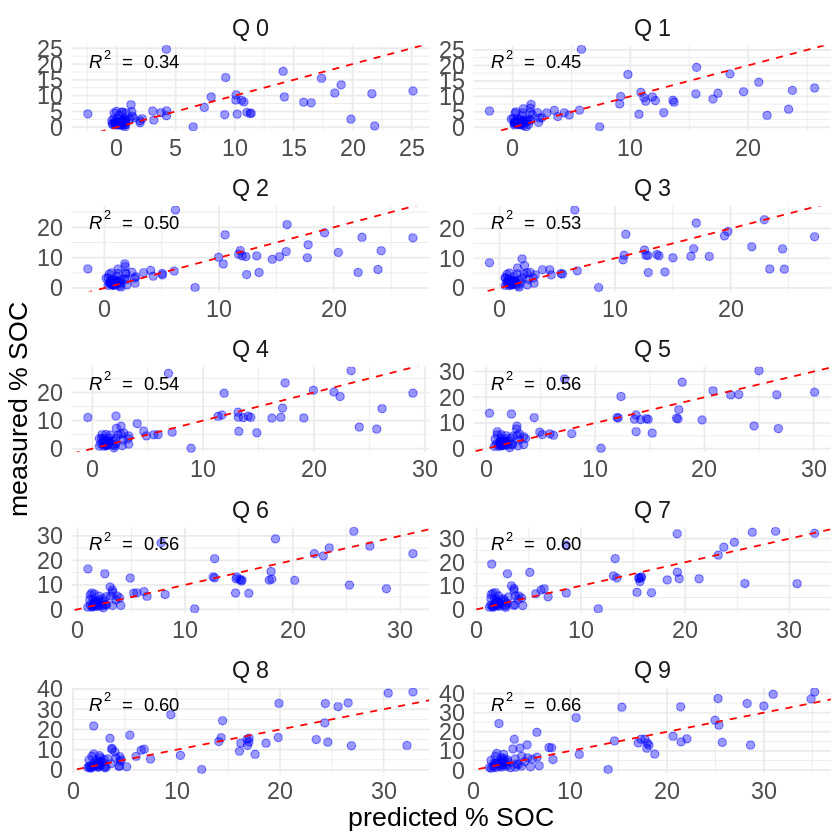

In [33]:
# Function to calculate R-squared and create the plot
plot_quantile <- function(data) {
  ggplot(data, aes(x = x_res, y = y_res)) +
    geom_point(color = "blue", size = 2) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +  # 1:1 line
    stat_poly_eq(aes(label = after_stat(rr.label)),
                 formula = y ~ x, parse = TRUE, color = "black") +
    labs(x = "x_res", y = "y_res", title = paste("Q:", unique(data$quantile_n_list))) +
    theme_minimal()
}

# Create a named vector to map original quantile numbers to "Quantile 1", "Quantile 2", etc.
quantile_labels <- setNames(paste("Q", unique(quantile_result$quantile_n_list)),
                            unique(quantile_result$quantile_n_list))

# Create the scatterplots for each quantile and facet them
ggplot(quantile_result, aes(x = x_res, y = y_res)) +
  geom_point(color = "blue", size = 2, alpha = 0.4) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +  # 1:1 line
  stat_poly_eq(aes(label = after_stat(rr.label)),
               formula = y ~ x, parse = TRUE, color = "black") +
  labs(x = "predicted % SOC", y = "measured % SOC") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  ) +
  facet_wrap(~ quantile_n_list,
             scales = "free", ncol = 2,
             labeller = labeller(quantile_n_list = quantile_labels)) +
  theme(strip.text.x = element_text(size = 14))  # Display the labels




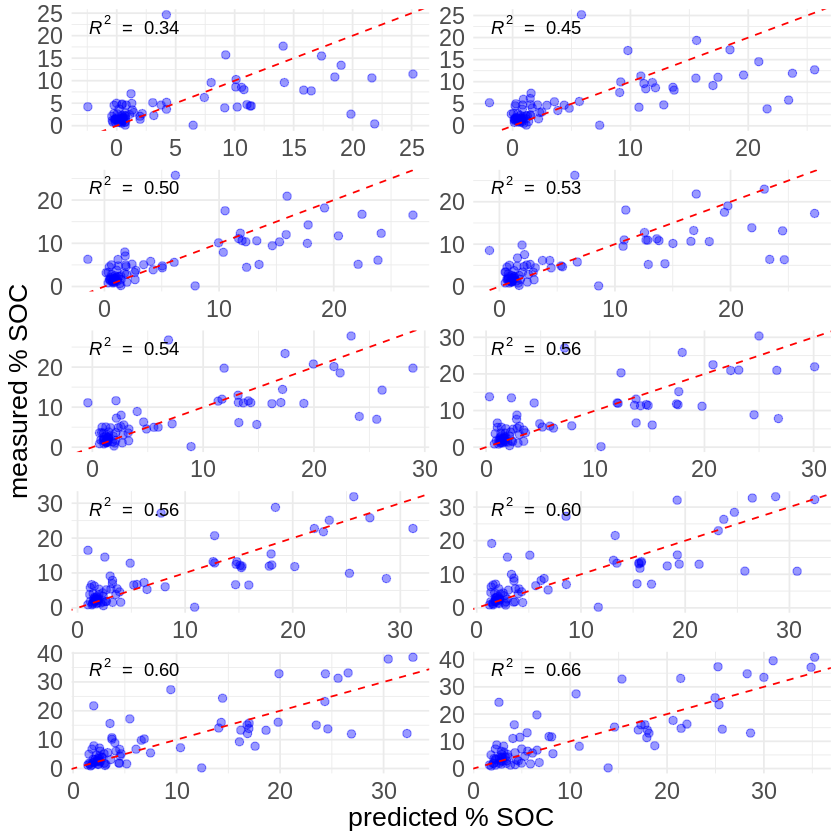

In [9]:

# Function to calculate R-squared and create the plot
plot_quantile <- function(data) {
  ggplot(data, aes(x = x_res, y = y_res)) +
    geom_point(color = "blue", size = 2) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +  # 1:1 line
    stat_poly_eq(aes(label = after_stat(rr.label)),
                 formula = y ~ x, parse = TRUE, color = "black") +
    labs(x = "x_res", y = "y_res", title = paste("Quantile:", unique(data$quantile_n_list))) +
    theme_minimal()
}

# Create the scatterplots for each quantile and facet them
ggplot(quantile_result, aes(x = x_res, y = y_res)) +
  geom_point(color = "blue", size = 2, alpha = 0.4) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +  # 1:1 line
  stat_poly_eq(aes(label = after_stat(rr.label)),
               formula = y ~ x, parse = TRUE, color = "black") +
  labs(x = "predicted % SOC", y = "measured % SOC") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  ) +
  facet_wrap(~ quantile_n_list, scales = "free", ncol = 2) +
  theme(strip.text.x = element_blank())
